In [3]:
import pandas as pd
import numpy as np

import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import(
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
    StackingRegressor,
)

from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Linear Regression

<b>Data Preparation</b>

In [11]:
df = pd.read_csv('MobilePhonedata_new.csv')
df = df.iloc[: , 1:]
X=df.drop("Price", axis=1)
y=df[["Price"]]
df.head()

,Brand,Model,ROM,RAM,OS,Screen size,Dual Sim,Expandable Memory,5G,Fingerprint Sensor,Price
0,Huawei,Y5 Prime,16.0,2.0,Android,5.5,1,1,0,1,5000
1,Huawei,Y5,16.0,2.0,Android,5.7,1,1,0,1,5000
2,Apple,iPhone 4S,16.0,0.5,iOS,3.5,0,0,0,0,5000
3,Huawei,Y5,16.0,2.0,Android,5.7,0,0,0,0,5000
4,Huawei,Y5,16.0,2.0,Android,5.7,1,0,0,0,5000


In [12]:
X = pd.get_dummies(X, columns=["Brand", "Model", "OS"], drop_first=True)
X.head()

,ROM,RAM,Screen size,Dual Sim,Expandable Memory,5G,Fingerprint Sensor,Brand_Asus,Brand_BlackBerry,Brand_Google,...,Model_iPhone XR,Model_iPhone XS,Model_iPhone XS Max,Model_style,Model_style 2,Model_style2,OS_BlackBerry OS,OS_Other,OS_Symbian OS,OS_iOS
0,16.0,2.0,5.5,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16.0,2.0,5.7,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16.0,0.5,3.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,16.0,2.0,5.7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16.0,2.0,5.7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.3, random_state=42
)
print(X_train

TypeError: 'tuple' object is not callable

<b>Choose Model, Train and Evaluate</b>

In [5]:


linearregression = LinearRegression()
linearregression.fit(X_train, y_train)

LinearRegression()

In [6]:
#Coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print(
        "The coefficients for {} is {}".format(col_name, linearregression.coef_[0][idx])
    )

The coefficients for ROM is 61.527755383068936
The coefficients for RAM is 2600.0050336064305
The coefficients for Screen size is 20521.7868823714
The coefficients for Dual Sim is -512.5111213197961
The coefficients for Expandable Memory is 37.53469006184605
The coefficients for 5G is -152.53142327998648
The coefficients for Fingerprint Sensor is 218.16283836581715
The coefficients for Brand_Asus is -319810838083761.8
The coefficients for Brand_BlackBerry is 638395539612675.0
The coefficients for Brand_Google is -524400294826179.06
The coefficients for Brand_Greentel is -389245266864382.6
The coefficients for Brand_HTC is -608422269917833.5
The coefficients for Brand_Huawei is -617135469714330.1
The coefficients for Brand_Infinix is -546516981971012.3
The coefficients for Brand_LG is -617135469736379.2
The coefficients for Brand_Nokia is -617135469740411.5
The coefficients for Brand_OnePlus is -617135469736074.8
The coefficients for Brand_Oppo is -616336526605159.4
The coefficients for

In [7]:
print("The intercept for our model is {}".format(linearregression.intercept_[0]))

The intercept for our model is 617135469652620.1


In [8]:
pred_train = linearregression.predict(X_train)
pred_test = linearregression.predict(X_test)

In [12]:
#R2 Squared
lrscore_train = linearregression.score(X_train, y_train)
lrscore_test = linearregression.score(X_test, y_test)
print(lrscore_train)
print(lrscore_test)

0.959856368037723
-7471083907223975.0


In [15]:
#RMSE
from sklearn.metrics import mean_squared_error
rmse_lr_train = mean_squared_error(y_train, pred_train, squared=False)
rmse_lr_test = mean_squared_error(y_test, pred_test, squared=False)
print(rmse_lr_train)
print(rmse_lr_test)

10490.4974880381
4460035302345.887


<b>Comparing the actual output values for X_test with the predicted values.</b>

In [17]:
data = y_test.copy()
data["pred"] = pred_test
data["residual"] = data["Price"] - data["pred"]
data.head()

,Price,pred,residual
9766,22000,21574.250,425.750
22672,39000,39102.875,-102.875
2300,11000,9508.750,1491.250
15956,29500,36316.875,-6816.875
27171,49000,43932.875,5067.125


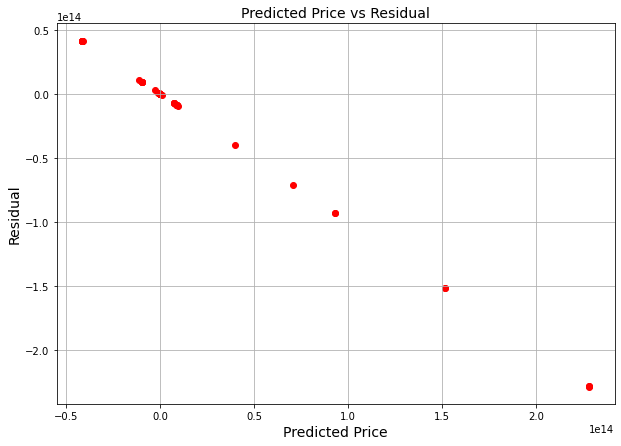

In [18]:
plt.figure(figsize=(10,7))
plt.scatter(data["pred"], data["residual"], color="red")
plt.title("Predicted Price vs Residual", fontsize=14)
plt.xlabel("Predicted Price", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.grid(True)
plt.show()

9766      425.750
22672    -102.875
2300     1491.250
15956   -6816.875
27171    5067.125
           ...   
6713     3885.375
39207    4630.750
14223     456.875
3475    -5356.625
37369   -5931.875
Name: residual, Length: 12008, dtype: float64


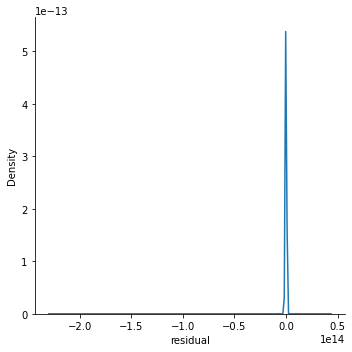

In [32]:
print(data.residual)
import seaborn as sns
d = pd.DataFrame(data.residual)

sns.displot(data=d, x = "residual",kind="kde")

Because of the complexity in the data, Linear Regression is not a good choice for this scenario.

### Random Forest Regressor 

In [111]:
from sklearn.ensemble import RandomForestRegressor
rfregressor =RandomForestRegressor(max_depth=80, min_samples_split=10,criterion="squared_error")
rfregressor.fit(X_train, y_train.values.ravel())

RandomForestRegressor(max_depth=80, min_samples_split=10)

In [112]:
y_train

,Price
6280,17500
5953,17000
40018,480000
24554,42000
34454,92000
...,...
6265,17500
11284,24000
38158,177000
860,7800


In [113]:
pred_train = rfregressor.predict(X_train)
pred_test = rfregressor.predict(X_test)

In [114]:
rfscore_train = rfregressor.score(X_train, y_train)
rfscore_test = rfregressor.score(X_test, y_test)
print(rfscore_train)
print(rfscore_test)

0.9766711574358379
0.958675586596727


The R-squared values are around 94% and 93% which is very high compared to Linear Regression. 

In [115]:
rmse_rf_train = mean_squared_error(y_train, pred_train, squared=False)
rmse_rf_test = mean_squared_error(y_test, pred_test, squared=False)
print(rmse_rf_train)
print(rmse_rf_test)

7997.13355703757
10489.380461766817


In [116]:
data = y_test.copy()
data["pred"] = pred_test
data["residual"] = data["Price"] - data["pred"]
data.head()

,Price,pred,residual
9766,22000,22268.680706,-268.680706
22672,39000,38939.270713,60.729287
2300,11000,10023.071350,976.928650
15956,29500,31646.511933,-2146.511933
27171,49000,50372.231171,-1372.231171


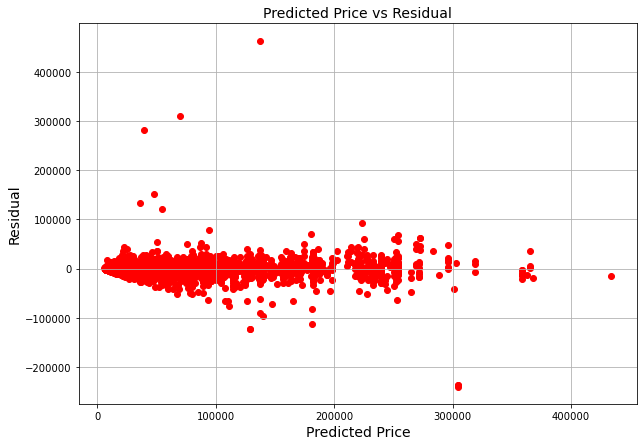

In [117]:
plt.figure(figsize=(10,7))
plt.scatter(data["pred"], data["residual"], color="red")
plt.title("Predicted Price vs Residual", fontsize=14)
plt.xlabel("Predicted Price", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.grid(True)
plt.show()

In [118]:
pd.DataFrame(rfregressor.feature_importances_, index=X_test.columns).sort_values(
    0, ascending=False
)

,0
RAM,0.356426
ROM,0.324770
OS_iOS,0.090880
Model_iPhone 12 Pro Max,0.071453
Screen size,0.030922
...,...
Model_1280,0.000000
Model_Desire 820s,0.000000
Model_GT 95,0.000000
Model_Desire 820,0.000000


### Adaboost Regressor

In [168]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
adaboost = AdaBoostRegressor(
    base_estimator = DecisionTreeRegressor(
        max_depth=10, min_samples_split=100, random_state=42
    ),
    random_state=42,
)
adaboost.fit(X_train, y_train.values.ravel())

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10,
                                                       min_samples_split=100,
                                                       random_state=42),
                  random_state=42)

In [169]:
pred_train = adaboost.predict(X_train)
pred_test = adaboost.predict(X_test)

In [170]:
adascore_train = adaboost.score(X_train, y_train)
adascore_test = adaboost.score(X_test, y_test)
print(adascore_train)
print(adascore_test)

0.9577148187527527
0.9177992416483988


In [171]:
#RMSE
rmse_ada_train = mean_squared_error(y_train, pred_train, squared=False)
rmse_ada_test = mean_squared_error(y_test, pred_test, squared=False)
print(rmse_ada_train)
print(rmse_ada_test)

10766.681133374179
14793.95868070616


In [172]:
data = y_test.copy()
data["pred"] = pred_test
data["residual"] = data["Price"] - data["pred"]
data.head()

,Price,pred,residual
9766,22000,21621.869919,378.130081
22672,39000,39347.566551,-347.566551
2300,11000,10282.313953,717.686047
15956,29500,36614.494297,-7114.494297
27171,49000,44986.162646,4013.837354


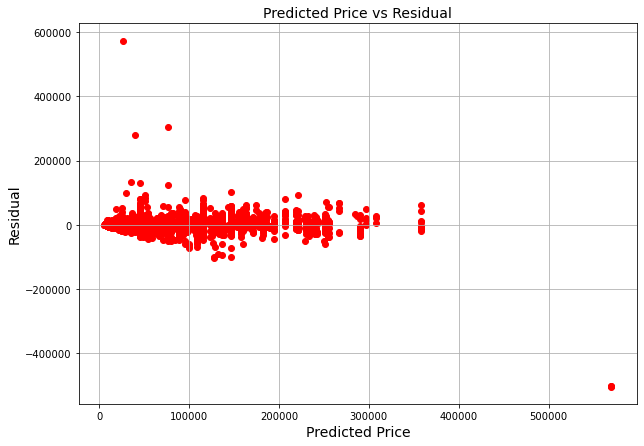

In [173]:
plt.figure(figsize=(10,7))
plt.scatter(data["pred"], data["residual"], color="red")
plt.title("Predicted Price vs Residual", fontsize=14)
plt.xlabel("Predicted Price", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.grid(True)
plt.show()

### Gradient Boost Regressor 

In [160]:
from sklearn.ensemble import GradientBoostingRegressor
gradientboost = GradientBoostingRegressor(
    max_depth=10, min_samples_split=100, learning_rate=0.01, random_state=42
)
gradientboost.fit(X_train, y_train.values.ravel())

GradientBoostingRegressor(learning_rate=0.01, max_depth=10,
                          min_samples_split=100, random_state=42)

In [161]:
pred_train = gradientboost.predict(X_train)
pred_test = gradientboost.predict(X_test)

In [162]:
#RMSE
rmse_gradient_train = mean_squared_error(y_train, pred_train, squared=False)
rmse_gradient_test = mean_squared_error(y_test, pred_test, squared=False)
print(rmse_gradient_train)
print(rmse_gradient_test)

21708.041257538713
22640.946964325023


In [163]:
data = y_test.copy()
data["pred"] = pred_test
data["residual"] = data["Price"] - data["pred"]
data.head()

,Price,pred,residual
9766,22000,33390.611009,-11390.611009
22672,39000,44112.677638,-5112.677638
2300,11000,25586.336529,-14586.336529
15956,29500,41557.130110,-12057.130110
27171,49000,48080.866667,919.133333


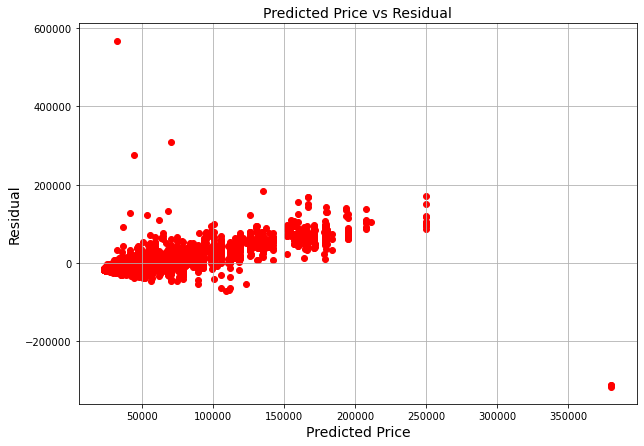

In [164]:
plt.figure(figsize=(10,7))
plt.scatter(data["pred"], data["residual"], color="red")
plt.title("Predicted Price vs Residual", fontsize=14)
plt.xlabel("Predicted Price", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.grid(True)
plt.show()

### MLP Regressor

In [143]:
from sklearn.neural_network import MLPRegressor
mlpregressor = MLPRegressor(
    hidden_layer_sizes=8,
    activation="relu",
    solver="adam",
    verbose=True,
    n_iter_no_change=1000,
    max_iter=20000,
    tol=0.001,
    random_state=42,
)
mlpregressor.fit(X_train, y_train.values.ravel())

Iteration 1, loss = 2761428338.74921465
Iteration 2, loss = 2759763516.83038330
Iteration 3, loss = 2755437584.95697117
Iteration 4, loss = 2747718301.68803835
Iteration 5, loss = 2737534432.01672077
Iteration 6, loss = 2725078488.26167488
Iteration 7, loss = 2710467970.19238806
Iteration 8, loss = 2693985138.15546751
Iteration 9, loss = 2675648573.74535513
Iteration 10, loss = 2655674761.86003160
Iteration 11, loss = 2634098654.23557806
Iteration 12, loss = 2611023376.49436522
Iteration 13, loss = 2586471741.91506481
Iteration 14, loss = 2560777532.26417160
Iteration 15, loss = 2533904547.16698647
Iteration 16, loss = 2505913336.15880489
Iteration 17, loss = 2476994909.90615082
Iteration 18, loss = 2447166898.67785168
Iteration 19, loss = 2416433486.72195005
Iteration 20, loss = 2384947113.64433146
Iteration 21, loss = 2352520746.24593067
Iteration 22, loss = 2319616729.40804672
Iteration 23, loss = 2286026015.86146641
Iteration 24, loss = 2252014272.88721561
Iteration 25, loss = 2217

Iteration 202, loss = 832479767.76120067
Iteration 203, loss = 832077190.02370203
Iteration 204, loss = 831703386.25419831
Iteration 205, loss = 831339020.73452783
Iteration 206, loss = 830971578.09829688
Iteration 207, loss = 830614516.40002012
Iteration 208, loss = 830249708.84494197
Iteration 209, loss = 829874912.58989155
Iteration 210, loss = 829507192.40978825
Iteration 211, loss = 829146334.79077864
Iteration 212, loss = 828780644.79648066
Iteration 213, loss = 828408017.45935869
Iteration 214, loss = 828030110.75071669
Iteration 215, loss = 827652205.73202395
Iteration 216, loss = 827290230.08004105
Iteration 217, loss = 826925784.01933908
Iteration 218, loss = 826557226.21452785
Iteration 219, loss = 826178727.98517954
Iteration 220, loss = 825816464.46189547
Iteration 221, loss = 825433517.95139790
Iteration 222, loss = 825068506.63075089
Iteration 223, loss = 824688799.52025127
Iteration 224, loss = 824327712.40249383
Iteration 225, loss = 823944115.53704083
Iteration 226, l

Iteration 402, loss = 746826305.07474256


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPRegressor(hidden_layer_sizes=8, max_iter=20000, n_iter_no_change=1000,
             random_state=42, tol=0.001, verbose=True)

In [144]:
pred_train = mlpregressor.predict(X_train)
pred_test = mlpregressor.predict(X_test)

In [145]:
mlpscore_train = mlpregressor.score(X_train, y_train)
mlpscore_test = mlpregressor.score(X_train, y_train)
print(mlpscore_train)
print(mlpscore_test)

0.45558407079866525
0.45558407079866525


In [146]:
#RMSE
rmse_mlp_train = mean_squared_error(y_train, pred_train, squared=False)
rmse_mlp_test = mean_squared_error(y_test, pred_test, squared=False)
print(rmse_mlp_train)
print(rmse_mlp_test)

38632.53127469313
38632.53127469313


In [147]:
data = y_test.copy()
data["pred"] = pred_test
data["residual"] = data["Price"] - data["pred"]
data.head()

,Price,pred,residual
9766,22000,34917.629766,-12917.629766
22672,39000,59658.372560,-20658.372560
2300,11000,18676.824547,-7676.824547
15956,29500,66024.552464,-36524.552464
27171,49000,48394.937410,605.062590


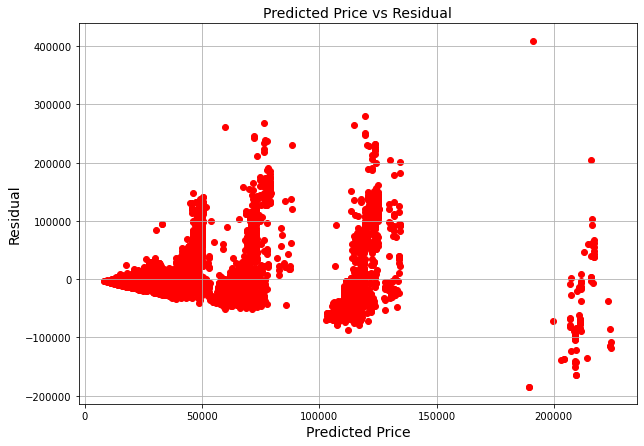

In [148]:
plt.figure(figsize=(10,7))
plt.scatter(data["pred"], data["residual"], color="red")
plt.title("Predicted Price vs Residual", fontsize=14)
plt.xlabel("Predicted Price", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.grid(True)
plt.show()

### XGB Regressor

In [155]:
from xgboost import XGBRegressor
xgbregressor = XGBRegressor(
    max_depth=10, learning_rate=0.1, reg_alpha=1, random_state=42
)
xgbregressor.fit(X_train, y_train.values.ravel())

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [156]:
pred_train = xgbregressor.predict(X_train)
pred_test = xgbregressor.predict(X_test)

In [159]:
xgbscore_train = xgbregressor.score(X_train, y_train)
xgbscore_test = xgbregressor.score(X_test, y_test)
print(xgbscore_train)
print(xgbscore_test)

0.9796397899682517
0.9471036458091542


In [165]:
#RMSE
rmse_xgb_train = mean_squared_error(y_train, pred_train, squared=False)
rmse_xgb_test = mean_squared_error(y_test, pred_test, squared=False)
print(rmse_xgb_train)
print(rmse_xgb_test)

21708.041257538713
22640.946964325023


In [166]:
data = y_test.copy()
data["pred"] = pred_test
data["residual"] = data["Price"] - data["pred"]
data.head()

,Price,pred,residual
9766,22000,33390.611009,-11390.611009
22672,39000,44112.677638,-5112.677638
2300,11000,25586.336529,-14586.336529
15956,29500,41557.130110,-12057.130110
27171,49000,48080.866667,919.133333


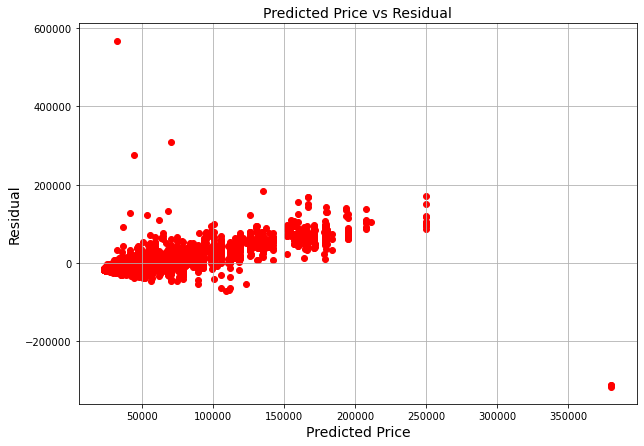

In [167]:
plt.figure(figsize=(10,7))
plt.scatter(data["pred"], data["residual"], color="red")
plt.title("Predicted Price vs Residual", fontsize=14)
plt.xlabel("Predicted Price", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.grid(True)
plt.show()